Here we show some plots to show the presence of mesoscale eddies in the different simulations. 

In [1]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import xgcm

In [2]:
## MOM6 
import gcsfs
import os

PERSISTENT_BUCKET = os.environ['PERSISTENT_BUCKET']
#fs = gcsfs.GCSFileSystem()
#fs.ls(f'{PERSISTENT_BUCKET}/MOM6/Phillips2Layer/')

ds_P2L = xr.open_zarr(f'{PERSISTENT_BUCKET}/MOM6/Phillips2Layer/res4km_sponge10day_long.zarr')

ds_DG = xr.open_zarr(f'{PERSISTENT_BUCKET}/MOM6/Double_Gyre/res5km/prog.zarr')

In [3]:
Lfilt= '100'

ds_P2L_filt = xr.open_zarr(f'{PERSISTENT_BUCKET}/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_'+Lfilt+'km_8_Aug_24.zarr')
ds_DG_filt = xr.open_zarr(f'{PERSISTENT_BUCKET}/MOM6/Double_Gyre/res5km/ml_data_'+Lfilt+'km_8_Aug_24.zarr')

In [4]:
ds_P2L_filt

<xarray.Dataset> Size: 7GB
Dimensions:  (Time: 7200, zi: 3, yh: 80, xh: 60, zl: 2)
Coordinates:
  * Time     (Time) object 58kB 0001-01-11 00:00:00 ... 0198-02-16 00:00:00
  * xh       (xh) float64 480B 10.0 30.0 50.0 ... 1.15e+03 1.17e+03 1.19e+03
  * yh       (yh) float64 640B 10.0 30.0 50.0 ... 1.55e+03 1.57e+03 1.59e+03
  * zi       (zi) float64 24B 1.03e+03 1.032e+03 1.034e+03
  * zl       (zl) float64 16B 1.031e+03 1.033e+03
Data variables: (12/14)
    dedx     (Time, zi, yh, xh) float64 829MB dask.array<chunksize=(36, 3, 80, 60), meta=np.ndarray>
    dedy     (Time, zi, yh, xh) float64 829MB dask.array<chunksize=(36, 3, 80, 60), meta=np.ndarray>
    dhdx     (Time, zl, yh, xh) float64 553MB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>
    dhdy     (Time, zl, yh, xh) float64 553MB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>
    dudx     (Time, zl, yh, xh) float64 553MB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>
    dudy     (Time, zl, yh, xh) float64 553MB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>
    ...       ...
    ebar     (Time, zi, yh, xh) float32 415MB dask.array<chunksize=(36, 3, 80, 60), meta=np.ndarray>
    hbar     (Time, zl, yh, xh) float32 276MB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>
    ubar     (Time, zl, yh, xh) float32 276MB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>
    uphp     (Time, zl, yh, xh) float32 276MB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>
    vbar     (Time, zl, yh, xh) float32 276MB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>
    vphp     (Time, zl, yh, xh) float32 276MB dask.array<chunksize=(36, 2, 80, 60), meta=np.ndarray>

In [5]:
f=1e-4

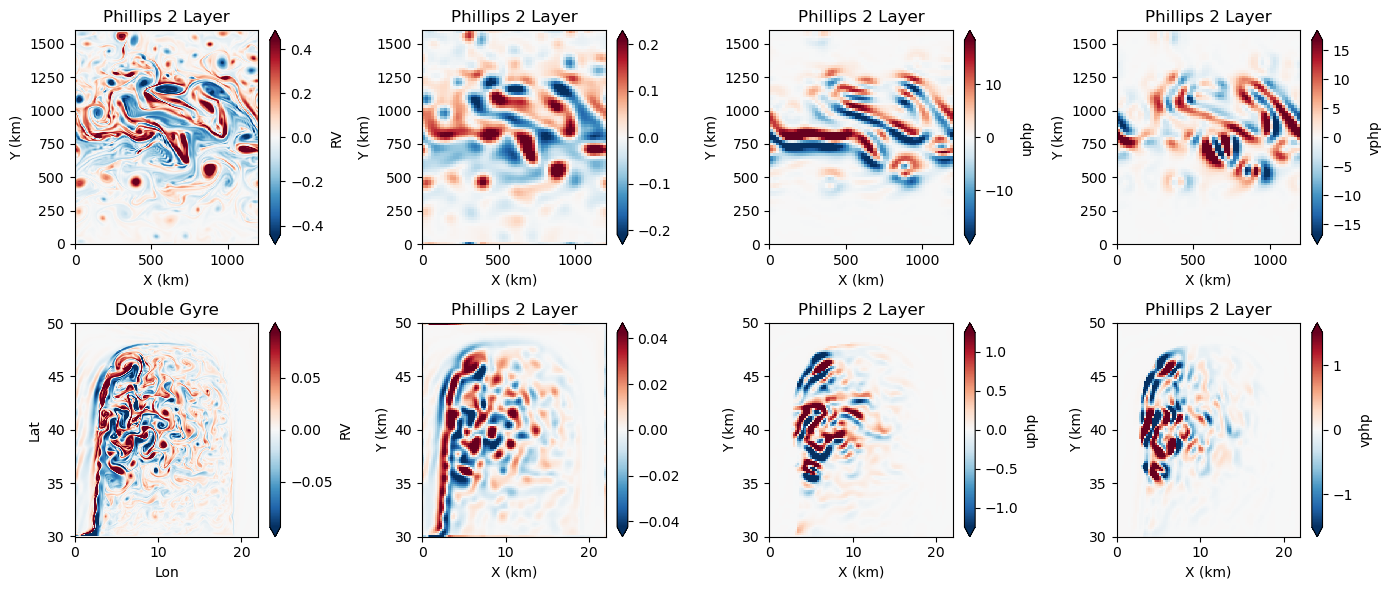

In [6]:
plt.figure(figsize=(14, 6))

plt.subplot(241)
(ds_P2L.RV/f).isel(Time=-1, zl=0).plot(robust=True, add_colorbar=True)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Phillips 2 Layer')

plt.subplot(242)
( (ds_P2L_filt.dvdx - ds_P2L_filt.dudy)/f).isel(Time=-1, zl=0).plot(robust=True, add_colorbar=True)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Phillips 2 Layer')

plt.subplot(243)
(ds_P2L_filt.uphp).isel(Time=-1, zl=0).plot(robust=True, add_colorbar=True)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Phillips 2 Layer')

plt.subplot(244)
(ds_P2L_filt.vphp).isel(Time=-1, zl=0).plot(robust=True, add_colorbar=True)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Phillips 2 Layer')

plt.subplot(245)
(ds_DG.RV/f).isel(Time=-1, zl=0).plot(robust=True, add_colorbar=True)
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.title('Double Gyre')


plt.subplot(246)
( (ds_DG_filt.dvdx - ds_DG_filt.dudy)/f).isel(Time=-1, zl=0).plot(robust=True, add_colorbar=True)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Phillips 2 Layer')

plt.subplot(247)
(ds_DG_filt.uphp).isel(Time=-1, zl=0).plot(robust=True, add_colorbar=True)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Phillips 2 Layer')

plt.subplot(248)
(ds_DG_filt.vphp).isel(Time=-1, zl=0).plot(robust=True, add_colorbar=True)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Phillips 2 Layer')

plt.tight_layout()

#plt.savefig('figure1.png', dpi=250)

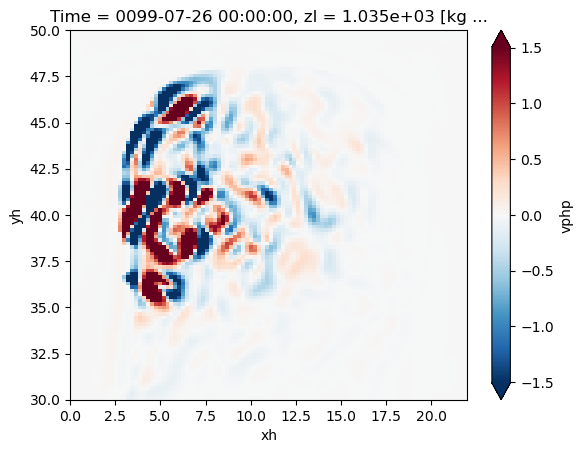

In [7]:
(ds_DG_filt.vphp).isel(Time=-1, zl=0).plot(robust=True, add_colorbar=True)


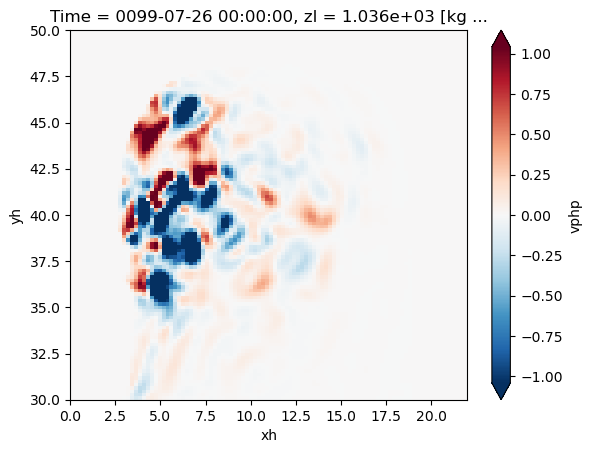

In [8]:
(ds_DG_filt.vphp).isel(Time=-1, zl=1).plot(robust=True, add_colorbar=True)


Figure saved as figure1.pdf


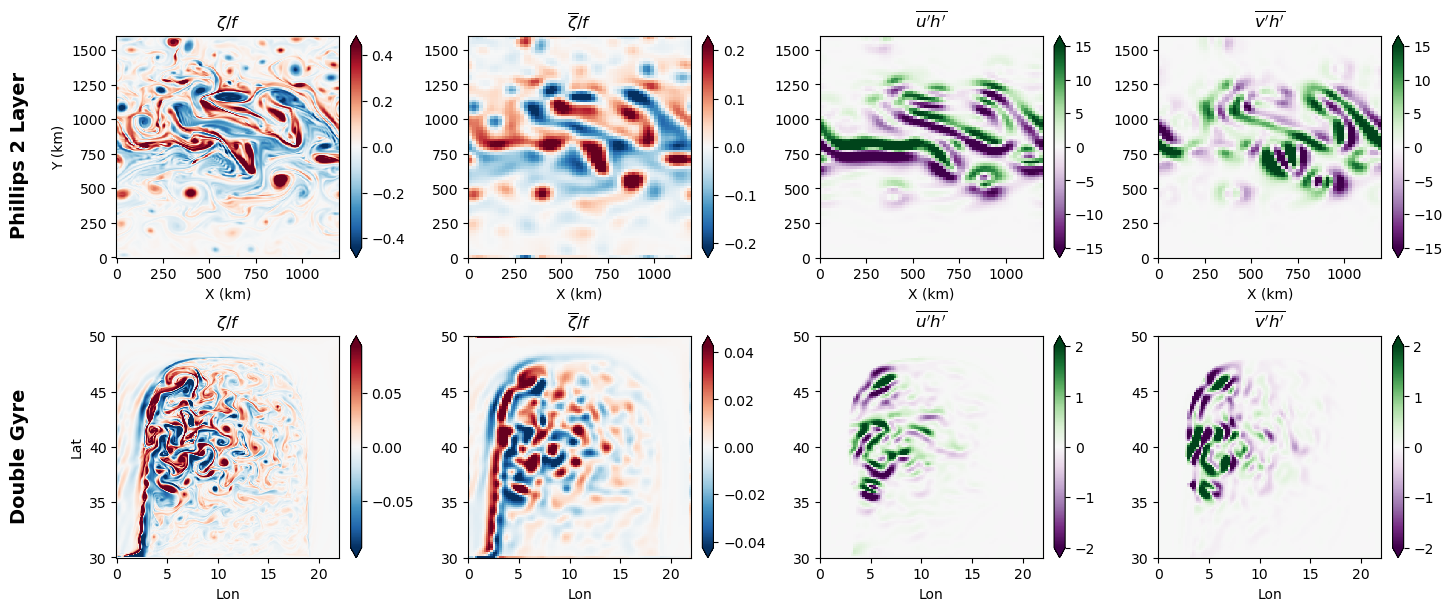

In [10]:
import matplotlib.pyplot as plt

# Define colormaps
vorticity_cmap = "RdBu_r"  # Colormap for vorticities
eddy_cmap = "PRGn"         # Colormap for eddy terms

# Define color limits for eddy terms
top_row_eddy_limits = {"vmin": -15, "vmax": 15}  # Adjust these values as needed for the top row
bottom_row_eddy_limits = {"vmin": -2, "vmax": 2}  # Adjust these values as needed for the bottom row

fig, axes = plt.subplots(2, 4, figsize=(14, 6), constrained_layout=True)

# Add rotated titles for experiments
fig.text(-0.02, 0.75, 'Phillips 2 Layer', va='center', ha='center', rotation='vertical', fontsize=14, fontweight='bold')
fig.text(-0.02, 0.25, 'Double Gyre', va='center', ha='center', rotation='vertical', fontsize=14, fontweight='bold')

# Titles for each column
column_titles = [r'$\zeta/f$', r'$\overline{\zeta}/f$', r"$\overline{u'h'}$", r"$\overline{v'h'}$"]

# Phillips 2 Layer plots
(ds_P2L.RV / f).isel(Time=-1, zl=0).plot(ax=axes[0, 0], robust=True, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=vorticity_cmap)
axes[0, 0].set_xlabel('X (km)')
axes[0, 0].set_ylabel('Y (km)')
axes[0, 0].set_title(column_titles[0], fontsize=12, fontweight='bold')

((ds_P2L_filt.dvdx - ds_P2L_filt.dudy) / f).isel(Time=-1, zl=0).plot(ax=axes[0, 1], robust=True, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=vorticity_cmap)
axes[0, 1].set_xlabel('X (km)')
axes[0, 1].set_ylabel('')
axes[0, 1].set_title(column_titles[1], fontsize=12, fontweight='bold')

ds_P2L_filt.uphp.isel(Time=-1, zl=0).plot(ax=axes[0, 2], robust=False, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=eddy_cmap, **top_row_eddy_limits)
axes[0, 2].set_xlabel('X (km)')
axes[0, 2].set_ylabel('')
axes[0, 2].set_title(column_titles[2], fontsize=12, fontweight='bold')

ds_P2L_filt.vphp.isel(Time=-1, zl=0).plot(ax=axes[0, 3], robust=False, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=eddy_cmap, **top_row_eddy_limits)
axes[0, 3].set_xlabel('X (km)')
axes[0, 3].set_ylabel('')
axes[0, 3].set_title(column_titles[3], fontsize=12, fontweight='bold')

# Double Gyre plots
(ds_DG.RV / f).isel(Time=-1, zl=0).plot(ax=axes[1, 0], robust=True, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=vorticity_cmap)
axes[1, 0].set_xlabel('Lon')
axes[1, 0].set_ylabel('Lat')
axes[1, 0].set_title(column_titles[0], fontsize=12, fontweight='bold')

((ds_DG_filt.dvdx - ds_DG_filt.dudy) / f).isel(Time=-1, zl=0).plot(ax=axes[1, 1], robust=True, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=vorticity_cmap)
axes[1, 1].set_xlabel('Lon')
axes[1, 1].set_ylabel('')
axes[1, 1].set_title(column_titles[1], fontsize=12, fontweight='bold')

ds_DG_filt.uphp.isel(Time=-1, zl=0).plot(ax=axes[1, 2], robust=False, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=eddy_cmap, **bottom_row_eddy_limits)
axes[1, 2].set_xlabel('Lon')
axes[1, 2].set_ylabel('')
axes[1, 2].set_title(column_titles[2], fontsize=12, fontweight='bold')

ds_DG_filt.vphp.isel(Time=-1, zl=0).plot(ax=axes[1, 3], robust=False, add_colorbar=True, cbar_kwargs={"label": ""}, cmap=eddy_cmap, **bottom_row_eddy_limits)
axes[1, 3].set_xlabel('Lon')
axes[1, 3].set_ylabel('')
axes[1, 3].set_title(column_titles[3], fontsize=12, fontweight='bold')


# Save the figure
output_filename = "figure1.pdf"
#fig.savefig(output_filename, format="pdf", dpi=300, bbox_inches="tight")
fig.savefig("vorticity_and_eddy_terms.png", format="png", dpi=150, bbox_inches="tight")

print(f"Figure saved as {output_filename}")

plt.show()

